In [138]:
#imports
import pickle
import pandas as pd
import numpy as np


In [139]:
#load apple_df_ML.pkl
apple_df_ML = pickle.load(open('apple_df_ML.pkl', 'rb'))


In [140]:
X = apple_df_ML.drop('gain', axis=1).values
y = apple_df_ML['gain'].values
X

array([[116.759684, 116.865102, 116.747758, ..., 116.736085, 116.768768,
        116.790573],
       [114.420705, 114.002524, 113.957528, ..., 114.433863, 114.488096,
        114.661564],
       [113.606819, 113.845019, 113.947424, ..., 115.136823, 115.125646,
        115.174199],
       ...,
       [141.985858, 142.114042, 142.227377, ..., 138.915147, 138.994524,
        138.938381],
       [137.599456, 137.384981, 137.338305, ..., 139.948746, 139.987529,
        139.921587],
       [137.627544, 137.508483, 137.48028 , ..., 136.956956, 136.90308 ,
        136.792118]])

In [141]:
# import the necessary modules
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1204)

In [143]:
from sklearn.preprocessing import MinMaxScaler

In [144]:
scaler = MinMaxScaler()

In [145]:
scaler.fit(X_train)

MinMaxScaler()

In [146]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
!TF_ENABLE_ONEDNN_OPTS=0
!CUDA_VISIBLE_DEVICES=0
!TF_ENABLE_ONEDNN_OPTS=0

In [147]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [148]:
model = Sequential()

model.add(Dense(units=1000, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=250, activation='relu'))
model.add(Dropout(0.1))

#model.add(Dense(units=125, activation='relu'))

#model.add(Dense(units=50, activation='relu'))

#model.add(Dense(units=25, activation='relu'))
#model.add(Dropout(0.1))

#model.add(Dense(units=10, activation='relu'))
#model.add(Dropout(0.1))

#model.add(Dense(units=4, activation='relu'))
#model.add(Dropout(0.1))

model.add(Dense(units=1, activation='sigmoid'))
model.add(Dropout(0.1))

#binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam')


In [150]:
#train the model
model.fit(x=X_train, y=y_train, epochs=50, batch_size=256, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
2/2 [==============================] - 0s 46ms/step - loss: 1.4792 - val_loss: 0.7129
Epoch 2/50
2/2 [==============================] - 0s 25ms/step - loss: 1.3507 - val_loss: 0.7305
Epoch 3/50
2/2 [==============================] - 0s 28ms/step - loss: 1.5048 - val_loss: 0.7091
Epoch 4/50
2/2 [==============================] - 0s 24ms/step - loss: 1.3963 - val_loss: 0.7005
Epoch 5/50
2/2 [==============================] - 0s 24ms/step - loss: 1.2762 - val_loss: 0.7106
Epoch 6/50
2/2 [==============================] - 0s 26ms/step - loss: 1.4671 - val_loss: 0.7262
Epoch 7/50
2/2 [==============================] - 0s 26ms/step - loss: 1.5376 - val_loss: 0.7178
Epoch 8/50
2/2 [==============================] - 0s 27ms/step - loss: 1.4960 - val_loss: 0.7002
Epoch 9/50
2/2 [==============================] - 0s 27ms/step - loss: 1.1313 - val_loss: 0.6967
Epoch 10/50
2/2 [==============================] - 0s 27ms/step - loss: 1.2771 - val_loss: 0.7137
Epoch 11/50
2/2 [============

<AxesSubplot:>

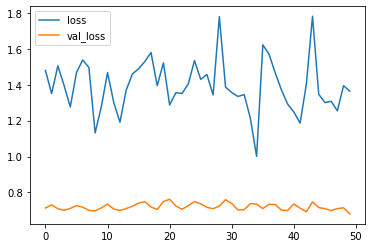

In [151]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [152]:
from sklearn.metrics import confusion_matrix, classification_report

In [153]:
# if model.predict(X_test) > 0.44 then 1 else 0:
predictions = model.predict(X_test)
predictions[predictions > predictions.mean()] = 1
predictions[predictions <= predictions.mean()] = 0
predictions

3/3 [==============================] - 0s 2ms/step


array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [154]:
print(classification_report(y_test, predictions,zero_division=0))

              precision    recall  f1-score   support

           0       0.53      0.57      0.55        42
           1       0.65      0.61      0.63        54

    accuracy                           0.59        96
   macro avg       0.59      0.59      0.59        96
weighted avg       0.60      0.59      0.59        96



In [155]:
confusion_matrix(y_test, predictions)

array([[24, 18],
       [21, 33]])